# Resolvendo um Problema de valor inicial com ferramenta do scipy

In [1]:
import numpy as np
from math import *
from scipy.integrate import odeint
from numba import jit
import matplotlib.pyplot as plt

# Problema
>## Um carro dragster com turbina vazia possui uma massa de 1250 kg e carrega uma massa de 250kg de propelente sólido. O motor é capaz de queimar o combustível a uma taxa de 50 kg/s, enquanto o ejeta a 1500 m/s em relação ao carro. Determine a velocidade máxima alcançada pelo carro se ele inicia seu movimento do repouso. Assuma a resistência do ar como $F_{ar} = (10v^2)N$, em que v é a velocidade do dragster em m/s. Negligencie a resistência dos pneus com o solo.
### Resposta: 86,3m/s

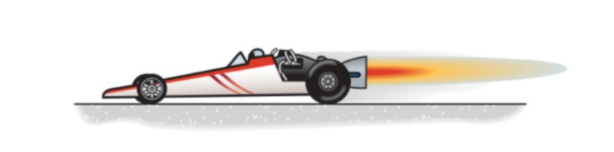

### Aplicando segunda lei de Newton no problema:
## $$ F_{res\ ext} = \frac{dp}{dt} = \frac{d(mv)}{dt} = \frac{dm}{dt}u   + m\frac{dv}{dt} $$

## $$ m = 1500 - 50t \rightarrow \frac{dm}{dt} = -50$$



## $$F_{res\ ext} = - 10 v^2  \longrightarrow - 10 v^2  = -50 \times 1500 + (1500 - 50t)\frac{dv}{dt} $$


## $$\frac{dv}{dt} = \frac{1500\times 50 - 10v^2}{1500 - 50t}$$

## $$\frac{dx}{dt} = v$$

In [2]:
# Definindo a função da taxa de variação da velocidade no tempo
#Sabemos que u=1500m/s, c = 50kg/s, b =10 m0= 1500kg

@jit # just in time compiler

def a(y,t):    # Aqui y é um array de dimensão dois: y[0] --> posição, y[1] ---> velocidade
    
    dxdt = y[1] 
    
    dvdt = (1500*50 - 10*(y[1]**2))/(1500 - 50*t)
    
    return dxdt, dvdt

#condições iniciais v = 0 e dvdt = uc/m0 = 50

y_0 = [0,0]                   # condições iniciais, carro na origem e em repouso
t = np.linspace(0,5 , 5000)  #A aceleração ocorre até 5s, quando há ainda combustível a ser queimado

In [3]:
sol = odeint(a, y_0, t) # resolve a equação diferencial tanto pra velocidade quanto pra aceleração no tempo
                        # odeint(função de variação, condição inicial, array tempo)

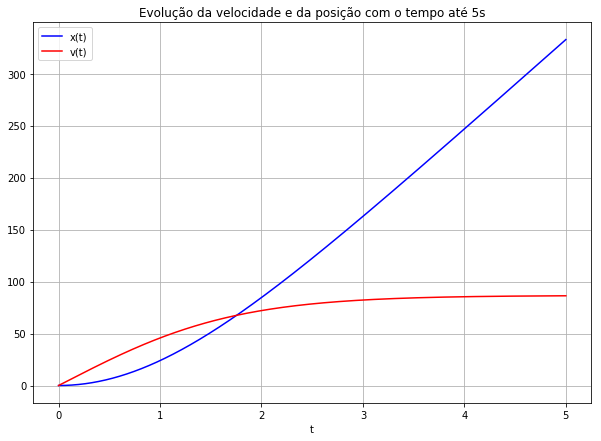

In [4]:
plt.figure(figsize = [10,7])
plt.plot(t, sol[:, 0], 'b', label='x(t)')  #plota a solução da posição
plt.plot(t, sol[:, 1], 'r', label='v(t)')  # plota a solução de v
plt.legend(loc='best')
plt.title('Evolução da velocidade e da posição com o tempo até 5s')
plt.xlabel('t')
plt.grid(True)
plt.show()

In [5]:
print(max(sol[:,1])) #Diz qual o valor máximo alcançado pela velocidade no intervalo de 0 até 5s

86.29003503720266
